In [1]:
#import neccessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt # processing dates
import plotly.express as px # charts plotting
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#read data
df = pd.read_excel("online+retail\\Online Retail.xlsx")

Checking and Preparing the Data

In [3]:
#Now we are all set to have a first look at our data.
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
#check the shape of the data
df.shape

(541909, 8)

In [5]:
#info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


While we have columns for product price and quantity, to get total value of each transaction - I will calculate it in a separate column.

In [6]:
#5-piont summary (descriptive statistics)
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [7]:
#columns in the data
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [8]:
#null values in the data
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
#null value percentage 
desc_nan_values = ((df['Description'].isnull().sum())/df.shape[0]) *100
customerid_nan_values = ((df['CustomerID'].isnull().sum())/df.shape[0]) *100
print(f'description :{desc_nan_values} & customer_id :{customerid_nan_values}')

description :0.2683107311375157 & customer_id :24.926694334288598


In [10]:
#Distnict products in description
df['Description'].nunique()

4223

Even though 0.20%nan values in description column is less but it help us to identify the top selleing products.

In [11]:
#after manually going through the data Identified there is relation between stockcode and description 
#Where StockCode is the unique id for each unique product in description column

In [12]:
df[df['Description'] =="10 COLOUR SPACEBOY PEN"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
448,536408,22418,10 COLOUR SPACEBOY PEN,24,2010-12-01 11:41:00,0.85,14307.0,United Kingdom
1330,536535,22418,10 COLOUR SPACEBOY PEN,24,2010-12-01 13:38:00,0.85,15605.0,United Kingdom
1573,536544,22418,10 COLOUR SPACEBOY PEN,1,2010-12-01 14:32:00,1.66,NaN,United Kingdom
2120,536560,22418,10 COLOUR SPACEBOY PEN,96,2010-12-01 15:00:00,0.85,13093.0,United Kingdom
3289,536618,22418,10 COLOUR SPACEBOY PEN,24,2010-12-02 10:17:00,0.85,17017.0,United Kingdom
...,...,...,...,...,...,...,...,...
535298,581196,22418,10 COLOUR SPACEBOY PEN,48,2011-12-07 17:25:00,0.85,12935.0,United Kingdom
535601,581217,22418,10 COLOUR SPACEBOY PEN,2,2011-12-08 09:20:00,1.63,NaN,United Kingdom
537141,581238,22418,10 COLOUR SPACEBOY PEN,1,2011-12-08 10:53:00,2.46,NaN,United Kingdom
539589,581439,22418,10 COLOUR SPACEBOY PEN,2,2011-12-08 16:30:00,1.63,NaN,United Kingdom


In [13]:
#Here in the above the item "10 COLOUR SPACEBOY PEN" stockcode is 581492
#Filling missing values in the Description column based on the unique StockCode could be a reasonable approach.

In [14]:
#Create a Mapping: 
    #First, create a mapping or dictionary that pairs each unique StockCode with its corresponding Description. 
    #This mapping will serve as a reference for filling in missing Description values.

#Validate: 
   #After filling in missing Description values based on StockCode,
   # it's important to validate the accuracy of the imputation. You can spot-check a sample of filled values against the original 
   #data to ensure that the descriptions match the corresponding products correctly.

#Handle Remaining Missing Values: 
    #If there are still missing Description values after applying this method, you can consider alternative approaches 
    #like imputing based on similar products with mode as it is a categorical column

In [15]:
# taking the unique ids for which description is nan to a list
unique_stock_code_product = list(df[df['Description'].isna()]["StockCode"].unique())

In [16]:
len(unique_stock_code_product)

960

In [17]:
# here  we have 960 unique ids

In [18]:
df[df['StockCode'].isin(unique_stock_code_product) & df['Description'].isna()].shape

(1454, 8)

In [19]:
#it is matching with the nan value count

In [20]:
# Step 1: Create a mapping of StockCode to Description
stockcode_description_mapping = df.groupby('StockCode')['Description'].first().reset_index()

In [21]:
stockcode_description_mapping.head()

,StockCode,Description
0,10002,INFLATABLE POLITICAL GLOBE
1,10080,GROOVY CACTUS INFLATABLE
2,10120,DOGGY RUBBER
3,10125,MINI FUNKY DESIGN TAPES
4,10133,COLOURING PENCILS BROWN TUBE


In [22]:
# Step 2: Fill missing Description values based on StockCode
def fill_missing_descriptions(row):
    if pd.isnull(row['Description']):
        stock_code = row['StockCode']
        description_row = stockcode_description_mapping.loc[stockcode_description_mapping['StockCode'] == stock_code]
        if not description_row.empty:
            return description_row.iloc[0]['Description']
        else:
            pass
    return row['Description']

df['Description'] = df.apply(fill_missing_descriptions, axis=1)

In [23]:
# Step 3: Validate the imputation 
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description       112
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [24]:
df[df['Description'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1970,536545,21134,None,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1987,536549,85226A,None,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
1988,536550,85044,None,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
2024,536552,20950,None,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
2026,536554,84670,None,23,2010-12-01 14:35:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
280754,561498,21610,None,-14,2011-07-27 14:10:00,0.0,NaN,United Kingdom
281615,561555,37477B,None,-11,2011-07-28 10:21:00,0.0,NaN,United Kingdom
281616,561557,37477C,None,-31,2011-07-28 10:21:00,0.0,NaN,United Kingdom
346849,567207,35592T,None,4,2011-09-19 11:01:00,0.0,NaN,United Kingdom


In [25]:
#stil we dont have description for 112

In [26]:
#randomly checking with one id - 84670
df[df['StockCode'].isin([84670])]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2026,536554,84670,None,23,2010-12-01 14:35:00,0.0,NaN,United Kingdom


In [27]:
df['Description'].mode()[0]

'WHITE HANGING HEART T-LIGHT HOLDER'

In [28]:
# Step 4: Handle remaining missing values with mode imputation
df['Description'] = df['Description'].fillna(df['Description'].mode()[0])

In [29]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [30]:
df[df['StockCode'].isin([84670])]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2026,536554,84670,WHITE HANGING HEART T-LIGHT HOLDER,23,2010-12-01 14:35:00,0.0,NaN,United Kingdom


In [31]:
df[df['CustomerID'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,RETROSPOT TEA SET CERAMIC 11 PC,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [32]:
# The CustomerID columns have missing values (NaN). 
#This suggests that for these records, either the description of the item purchased or the customer who made the purchase is not available.

In [33]:
#dropping the customerid is not right approach because we need taht column in customer analysis 
#so lets impute the missing values with mean.

In [34]:
#filling nan values with median
df['CustomerID'] = df['CustomerID'].fillna(df['CustomerID'].mean())

In [35]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [36]:
#check duplicates
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [37]:
duplicated_df = df[df.duplicated()]

C:\Users\User\AppData\Local\Temp\ipykernel_19160\2749725312.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicated_df['year_month'] = duplicated_df['InvoiceDate'].dt.strftime('%Y.%m')


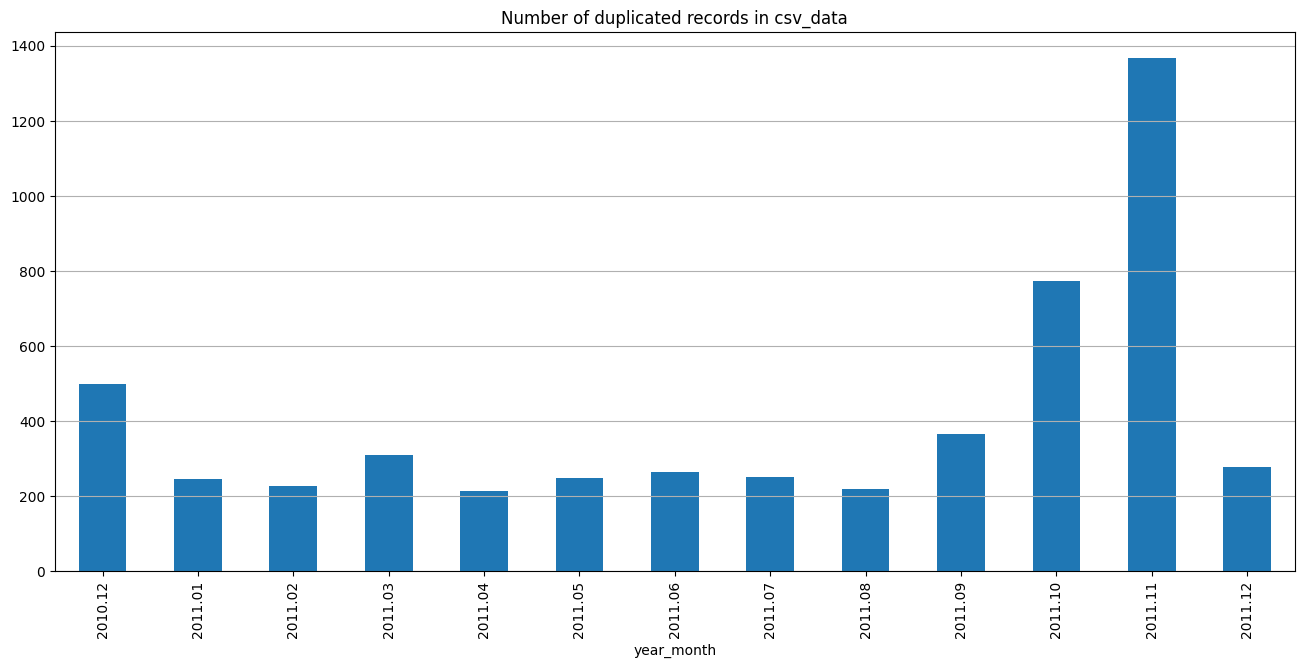

In [38]:
# add year_month column to duplicated data
duplicated_df['year_month'] = duplicated_df['InvoiceDate'].dt.strftime('%Y.%m')
# duplicated_df['year_month'] = duplicated_df['InvoiceDate'].apply(lambda x: x[:7])
plt.figure(figsize=(16,7))
duplicated_df['year_month'].value_counts(sort = False).plot.bar()
plt.title('Number of duplicated records in csv_data')
plt.grid(which = 'major', axis = 'y')
plt.show()

In [39]:
#drop duplicates
df.drop_duplicates(keep='first', inplace=True)

In [40]:
df.shape

(536641, 8)

In [41]:
df['Quantity'].value_counts()

Quantity
 1        144495
 2         81245
 12        60858
 6         40656
 4         38393
           ...  
-472           1
-161           1
-1206          1
-272           1
-80995         1
Name: count, Length: 722, dtype: int64

In [42]:
df['UnitPrice'].value_counts()

UnitPrice
1.25      49750
1.65      37627
0.85      28182
2.95      27350
0.42      24277
          ...  
46.86         1
28.66         1
156.45        1
11.00         1
224.69        1
Name: count, Length: 1630, dtype: int64

In [43]:
#The UnitPrice column has zero values. This might indicate either free items, items with promotional prices, or possibly errors in recording the data.
#Negative Quantity: There are records with negative quantities, which might represent returns or cancellations.

In [44]:
#Invoice 
#In the data description, if Invoice starts with the letter 'c', it indicates a cancellation. 
#But, what are other letter codes are in the Invoice and what do they mean?

#Below, we shall check the non-int characters and their positions in the Invoice entries.

In [45]:
df[df["InvoiceNo"].str.contains("C", na=False)].head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [46]:
from collections import defaultdict
def check_codes(df, col):
    '''
    check for non-int characters and their positions in string entries in col
    takes a dataframe, col. returns unique non-int characters and their positions
    '''
    string_positions = defaultdict(int)
    # check if the character in  string converts to int,
    # if valueError, add the character and its position to string_positions dict
    for item in df[col].values:
        item = str(item)  # make sure it is string
        for char in item:
            try:
                is_int = int(char)
            except ValueError:
                string_positions[(char, item.index(char))] += 1
    return string_positions

In [47]:
invoice_col_len = df['InvoiceNo'].apply(lambda x: len(str(x)))  # length of entries
print('The length of each Invoice')
print(invoice_col_len.value_counts())
print('The non-Int characters and their positions within Invoice', check_codes(df, 'InvoiceNo'))

The length of each Invoice
InvoiceNo
6    527387
7      9254
Name: count, dtype: int64
The non-Int characters and their positions within Invoice defaultdict(<class 'int'>, {('C', 0): 9251, ('A', 0): 3})


In [48]:
df[df['InvoiceNo'].str.contains('A', na = False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,15287.69057,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,15287.69057,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,15287.69057,United Kingdom


In [49]:
df.loc[(df['InvoiceNo'].str.contains('C', na = False)) & (df['Quantity'] >= 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [50]:
#We can now see that the Invoice Column contains 6 or 7 character strings. 
#The 7 character string, 9251 (1.75%) mostly begin with C with only 3 beginning with letter A.

#Looking at these records of data that start with A or C, we can make the following observations:

#Records with Invoice beginning with A
##represent an adjustment for bad debt and are not associated to any Customer ID
#mostly associated with large negative Price value and Quantity of 1. Although this is not always the case. See Invoice A563185
#There is some entries that are clearly related but not exactly duplicates. A563185, A563186, and A563187
#It appears that these adjustments are not directly related to product sales but some accounting procedure. 
#We shall make this assumption in the follow up analysis.
#Records with Invoice starting with C
#This appear to be associated with negative values of Quantity, although not always. 

In [51]:
#preparing the data which dont have cancelled products, and negative quantity

In [52]:
cancelled_df = df.loc[(df['InvoiceNo'].str.contains('C', na = False))]

In [53]:
cancelled_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


C:\Users\User\AppData\Local\Temp\ipykernel_19160\2096909691.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancelled_df['year_month'] = cancelled_df['InvoiceDate'].dt.strftime('%Y.%m')


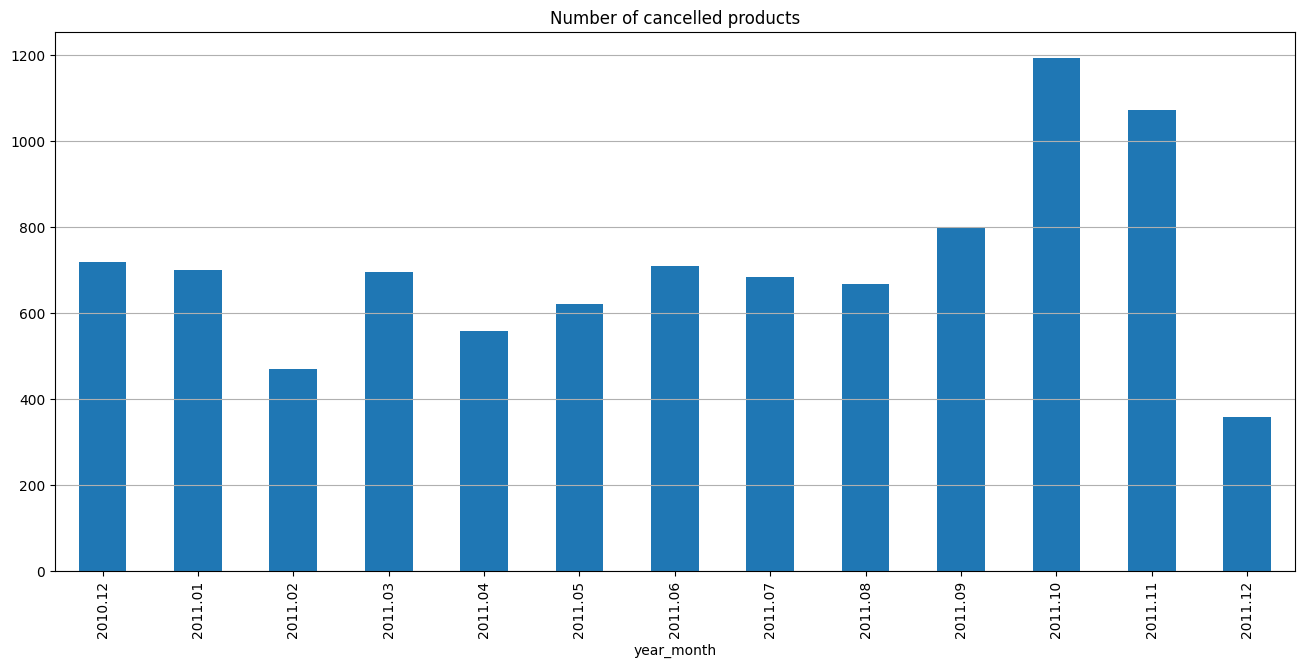

In [54]:
# add year_month column to duplicated data
cancelled_df['year_month'] = cancelled_df['InvoiceDate'].dt.strftime('%Y.%m')
# duplicated_df['year_month'] = duplicated_df['InvoiceDate'].apply(lambda x: x[:7])
plt.figure(figsize=(16,7))
cancelled_df['year_month'].value_counts(sort = False).plot.bar()
plt.title('Number of cancelled products')
plt.grid(which = 'major', axis = 'y')
plt.show()

In [55]:
cancelled_df['Quantity'].sum() 

-275560

In [56]:
cancelled_df['CustomerID'].nunique()

1590

In [57]:
cancelled_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
year_month     0
dtype: int64

In [58]:
def data_prep(dataframe):
  dataframe.dropna(inplace=True)
  dataframe = dataframe[~dataframe["InvoiceNo"].str.contains("C",na=False)]
  dataframe = dataframe[~dataframe["InvoiceNo"].str.contains("A",na=False)]
  dataframe = dataframe[dataframe["Quantity"] > 0]
  dataframe = dataframe[dataframe["UnitPrice"] > 0]
  return dataframe

In [59]:
sorted_df = data_prep(df)
sorted_df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,524877.0,10.616619,1.0,1.0,4.0,11.0,80995.0,156.280179
InvoiceDate,524877,2011-07-04 15:30:09.901862912,2010-12-01 08:26:00,2011-03-28 12:13:00,2011-07-20 11:22:00,2011-10-19 11:41:00,2011-12-09 12:50:00,NaN
UnitPrice,524877.0,3.901505,0.001,1.25,2.08,4.13,13541.33,32.7068
CustomerID,524877.0,15287.805259,12346.0,14375.0,15287.69057,16245.0,18287.0,1482.146898


In [60]:
sorted_df.loc[(df['InvoiceNo'].str.contains('C', na = False))]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [61]:
#creating a new column revenue which is the multiplication of quantity and unitprice
sorted_df['Revenue'] = sorted_df['Quantity'] * sorted_df['UnitPrice']

In [62]:
sorted_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


<Axes: ylabel='Revenue'>

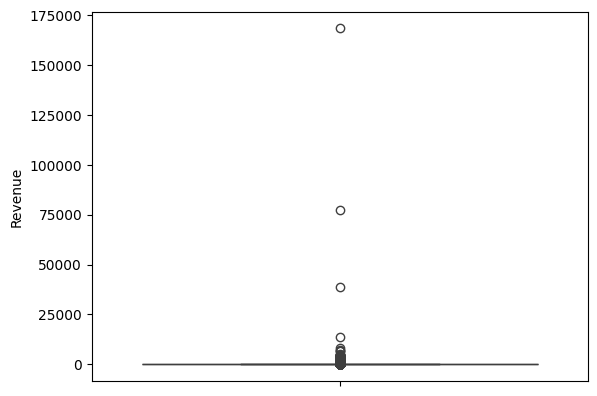

In [63]:
sns.boxplot(sorted_df['Revenue'])

In [64]:
#Outlier removal
# Define the columns for outlier removal ('Quantity', "Revenue" and 'UnitPrice')
numerical_columns = ['Quantity', 'UnitPrice',"Revenue"]

# Function to remove outliers based on IQR
def remove_outliers(df, columns, threshold=1.5):
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [65]:
# Call the function to remove outliers
df_cleaned = remove_outliers(sorted_df, numerical_columns)

Time Features: Extract year, month, day, and possibly weekday from the InvoiceDate

In [66]:
df_cleaned['Date'] = pd.to_datetime(df_cleaned['InvoiceDate']).dt.date #Get the date
df_cleaned['Year'] = pd.to_datetime(df_cleaned['InvoiceDate']).dt.year #Get the year
df_cleaned['Month'] = pd.to_datetime(df_cleaned['InvoiceDate']).dt.month #Get the month
df_cleaned['Time_hour'] = pd.to_datetime(df_cleaned['InvoiceDate']).dt.hour #Get the hour
df_cleaned['year_month'] = df_cleaned['InvoiceDate'].dt.strftime('%Y.%m') #Get the year-month
df_cleaned.insert(loc=13,column='day', value=(df_cleaned.InvoiceDate.dt.dayofweek)+1) #Get the day

In [67]:
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Date,Year,Month,Time_hour,day,year_month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010,12,8,3,2010.12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010,12,8,3,2010.12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010,12,8,3,2010.12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010,12,8,3,2010.12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010,12,8,3,2010.12


In [68]:
df_cleaned['year_month'].value_counts()

year_month
2011.11    70055
2011.10    49719
2011.09    40822
2010.12    33075
2011.07    32610
2011.06    29692
2011.05    29585
2011.03    29505
2011.01    28797
2011.08    28394
2011.04    24307
2011.02    22298
2011.12    20951
Name: count, dtype: int64

Analyze sales trends over time

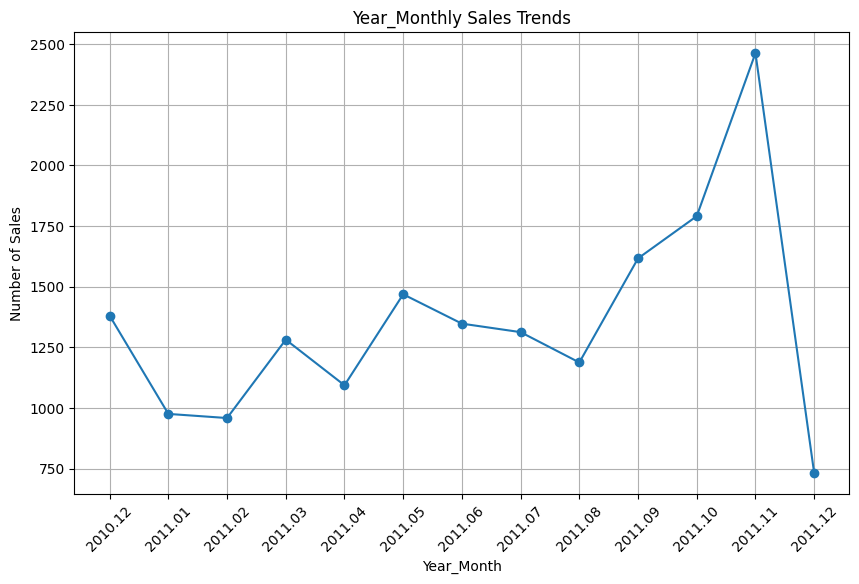

In [69]:
# Analyze sales trends over time
monthly_sales = df_cleaned.groupby(df_cleaned['year_month']).agg({'InvoiceNo': 'nunique'}).reset_index()
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['year_month'].astype(str), monthly_sales['InvoiceNo'], marker='o')
plt.title('Year_Monthly Sales Trends')
plt.xlabel('Year_Month')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

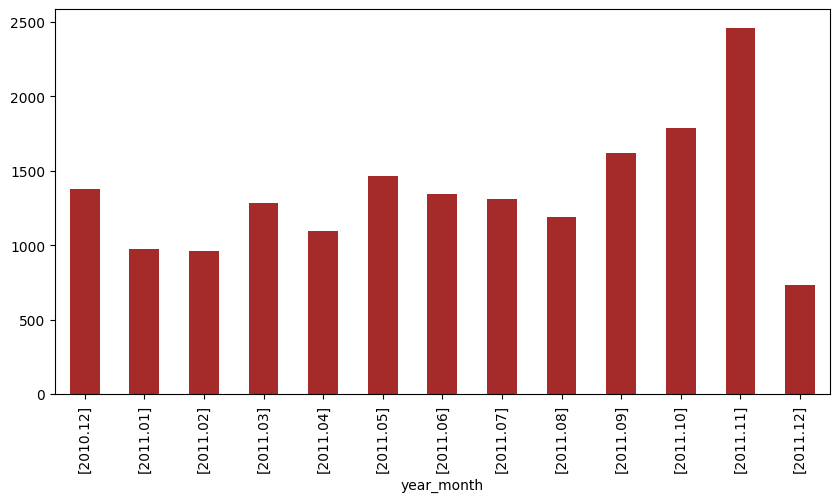

In [70]:
#Visualization of year-month in terms orders across the dataset
ax = df_cleaned.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index().plot(kind='bar',figsize=(10,5),color='#A52A2A')

Tallest bar is at[201111] point which represents November of 2011. Sales are mostly high in the month of November in 2011.

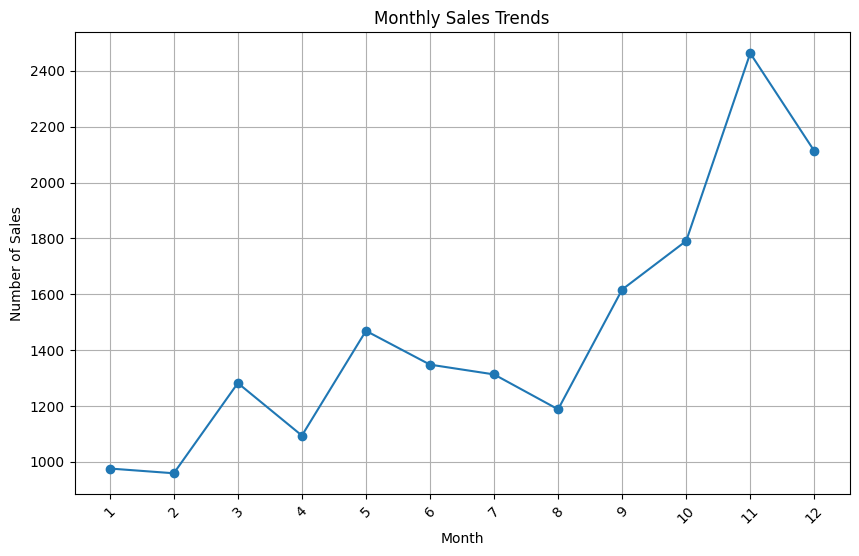

In [71]:
# Analyze sales trends over time
monthly_sales = df_cleaned.groupby(df_cleaned['Month']).agg({'InvoiceNo': 'nunique'}).reset_index()
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Month'].astype(str), monthly_sales['InvoiceNo'], marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Peak is at top at 11 point which represents November. Sales are mostly high in the month of November.

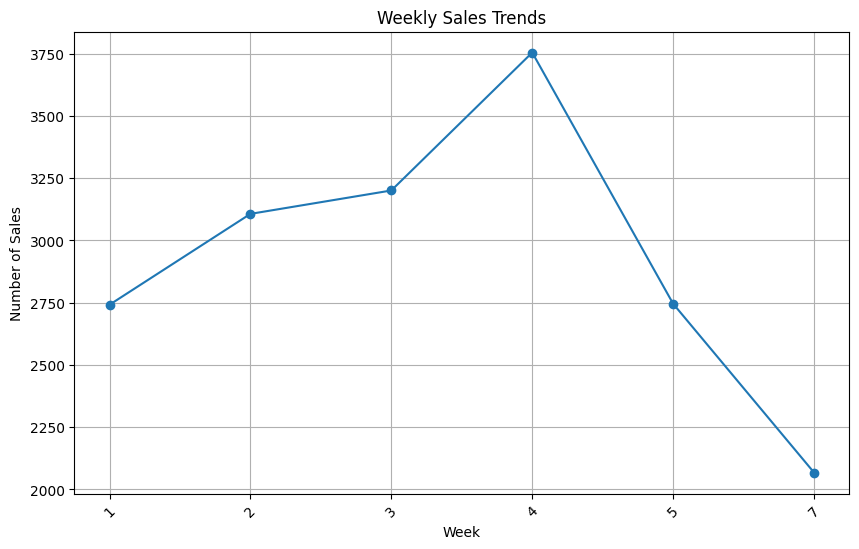

In [72]:
# Analyze sales trends over time
monthly_sales = df_cleaned.groupby(df_cleaned['day']).agg({'InvoiceNo': 'nunique'}).reset_index()
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['day'].astype(str), monthly_sales['InvoiceNo'], marker='o')
plt.title('Weekly Sales Trends')
plt.xlabel('Week')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

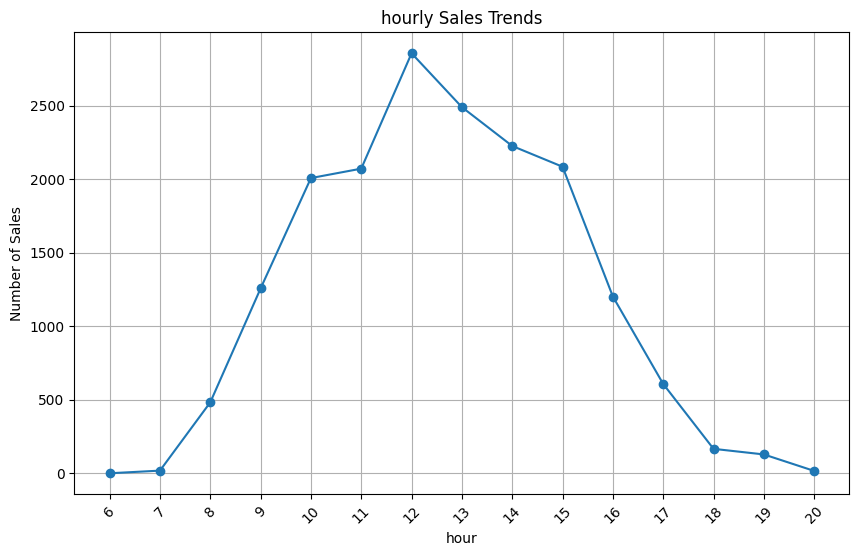

In [73]:
# Analyze sales trends over time
monthly_sales = df_cleaned.groupby(df_cleaned['Time_hour']).agg({'InvoiceNo': 'nunique'}).reset_index()
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Time_hour'].astype(str), monthly_sales['InvoiceNo'], marker='o')
plt.title('hourly Sales Trends')
plt.xlabel('hour')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Peak is high between 12 and 14. So, Sales are high from 12.00 pm to 2.00 pm.

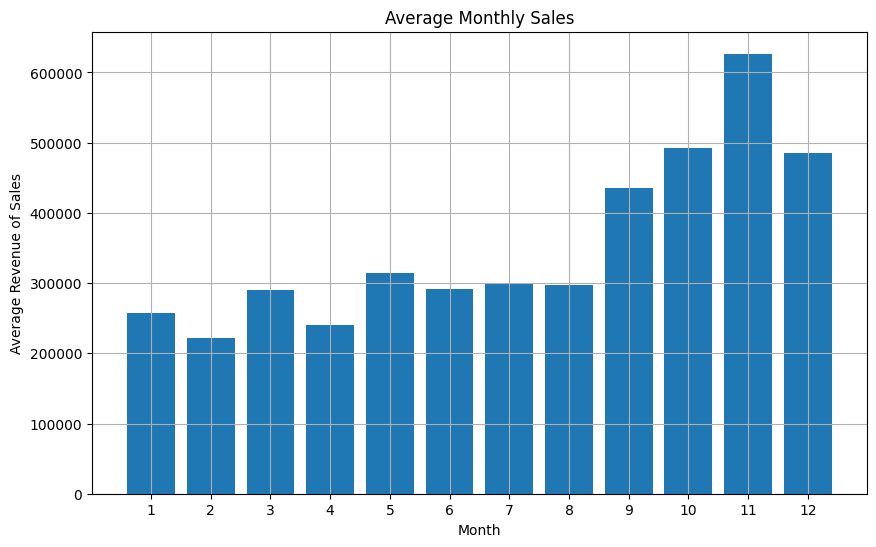

In [74]:
# monthly_sales['Month'] = monthly_sales['InvoiceDate'].dt.month
monthly_sales_grouped = df_cleaned.groupby('Month').agg({'Revenue': 'sum'}).reset_index()
plt.figure(figsize=(10, 6))
plt.bar(monthly_sales_grouped['Month'], monthly_sales_grouped['Revenue'])
plt.title('Average Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Average Revenue of Sales')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

In [75]:
#top selling products

In [76]:
top_selling_products = df_cleaned.groupby('Description')['Quantity'].sum().nlargest(10)
print("Top Selling Products:")
print(top_selling_products)

Top Selling Products:
Description
PACK OF 72 RETROSPOT CAKE CASES       16026
ASSORTED COLOUR BIRD ORNAMENT         10815
LUNCH BAG RED RETROSPOT               10118
JUMBO BAG RED RETROSPOT                9720
JAM MAKING SET PRINTED                 9465
PACK OF 60 PINK PAISLEY CAKE CASES     9040
60 TEATIME FAIRY CAKE CASES            8901
VICTORIAN GLASS HANGING T-LIGHT        7857
LUNCH BAG  BLACK SKULL.                7725
SET OF 4 PANTRY JELLY MOULDS           7609
Name: Quantity, dtype: int64


In [77]:
#Most common purcharsed stocks
#Grouping of stockcode with the highest quantity
sorted_df.groupby(['StockCode','Description'],as_index= False)['Quantity'].sum().sort_values(by='Quantity', ascending=False).head(10)


,StockCode,Description,Quantity
2590,23843,"PAPER CRAFT , LITTLE BIRDIE",80995
2045,23166,MEDIUM CERAMIC TOP STORAGE JAR,78033
2769,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54951
3761,85099B,JUMBO BAG RED RETROSPOT,48371
3773,85123A,WHITE HANGING HEART T-LIGHT HOLDER,37580
1051,22197,POPCORN HOLDER,36749
370,21212,PACK OF 72 RETROSPOT CAKE CASES,36396
2875,84879,ASSORTED COLOUR BIRD ORNAMENT,36362
1951,23084,RABBIT NIGHT LIGHT,30739
1327,22492,MINI PAINT SET VINTAGE,26633


In [78]:
sorted_df.groupby(['StockCode','Description'],as_index= False)['Quantity'].sum().sort_values(by='Quantity', ascending=False).head(10)

,StockCode,Description,Quantity
2590,23843,"PAPER CRAFT , LITTLE BIRDIE",80995
2045,23166,MEDIUM CERAMIC TOP STORAGE JAR,78033
2769,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54951
3761,85099B,JUMBO BAG RED RETROSPOT,48371
3773,85123A,WHITE HANGING HEART T-LIGHT HOLDER,37580
1051,22197,POPCORN HOLDER,36749
370,21212,PACK OF 72 RETROSPOT CAKE CASES,36396
2875,84879,ASSORTED COLOUR BIRD ORNAMENT,36362
1951,23084,RABBIT NIGHT LIGHT,30739
1327,22492,MINI PAINT SET VINTAGE,26633


In [79]:
sorted_df.groupby(['StockCode','Description'])['InvoiceNo'].count().sort_values(ascending=False).head(10)

StockCode  Description                       
85123A     WHITE HANGING HEART T-LIGHT HOLDER    2244
85099B     JUMBO BAG RED RETROSPOT               2109
22423      REGENCY CAKESTAND 3 TIER              2007
47566      PARTY BUNTING                         1699
20725      LUNCH BAG RED RETROSPOT               1581
84879      ASSORTED COLOUR BIRD ORNAMENT         1476
22720      SET OF 3 CAKE TINS PANTRY DESIGN      1392
21212      PACK OF 72 RETROSPOT CAKE CASES       1352
20727      LUNCH BAG  BLACK SKULL.               1301
22457      NATURAL SLATE HEART CHALKBOARD        1255
Name: InvoiceNo, dtype: int64

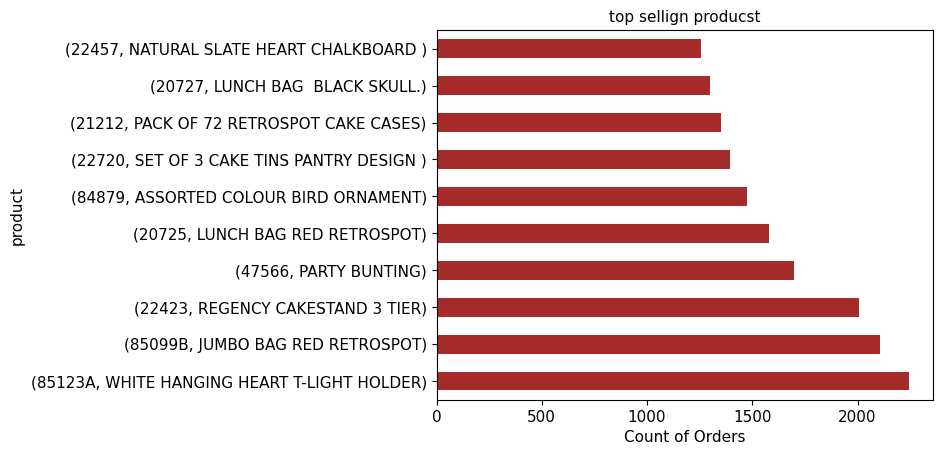

In [80]:
group_desc = sorted_df.groupby(['StockCode','Description'])['InvoiceNo'].count().sort_values(ascending=False).head(10)

# plot number of unique customers in each country
# plt.subplots(figsize=(20,10))
group_desc.plot(kind = 'barh', fontsize=11,color='#A52A2A')
plt.xlabel('Count of Orders', fontsize=11)
plt.ylabel('product', fontsize=11)
plt.title('top sellign producst', fontsize=11)
plt.show()

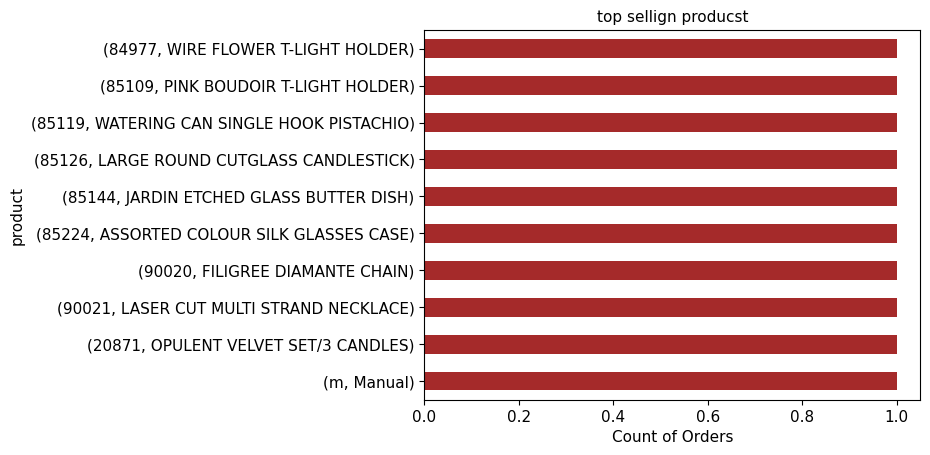

In [81]:
group_desc = sorted_df.groupby(['StockCode','Description'])['InvoiceNo'].count().sort_values(ascending=True).head(10)

# plot number of unique customers in each country
# plt.subplots(figsize=(20,10))
group_desc.plot(kind = 'barh', fontsize=11,color='#A52A2A')
plt.xlabel('Count of Orders', fontsize=11)
plt.ylabel('product', fontsize=11)
plt.title('top sellign producst', fontsize=11)
plt.show()

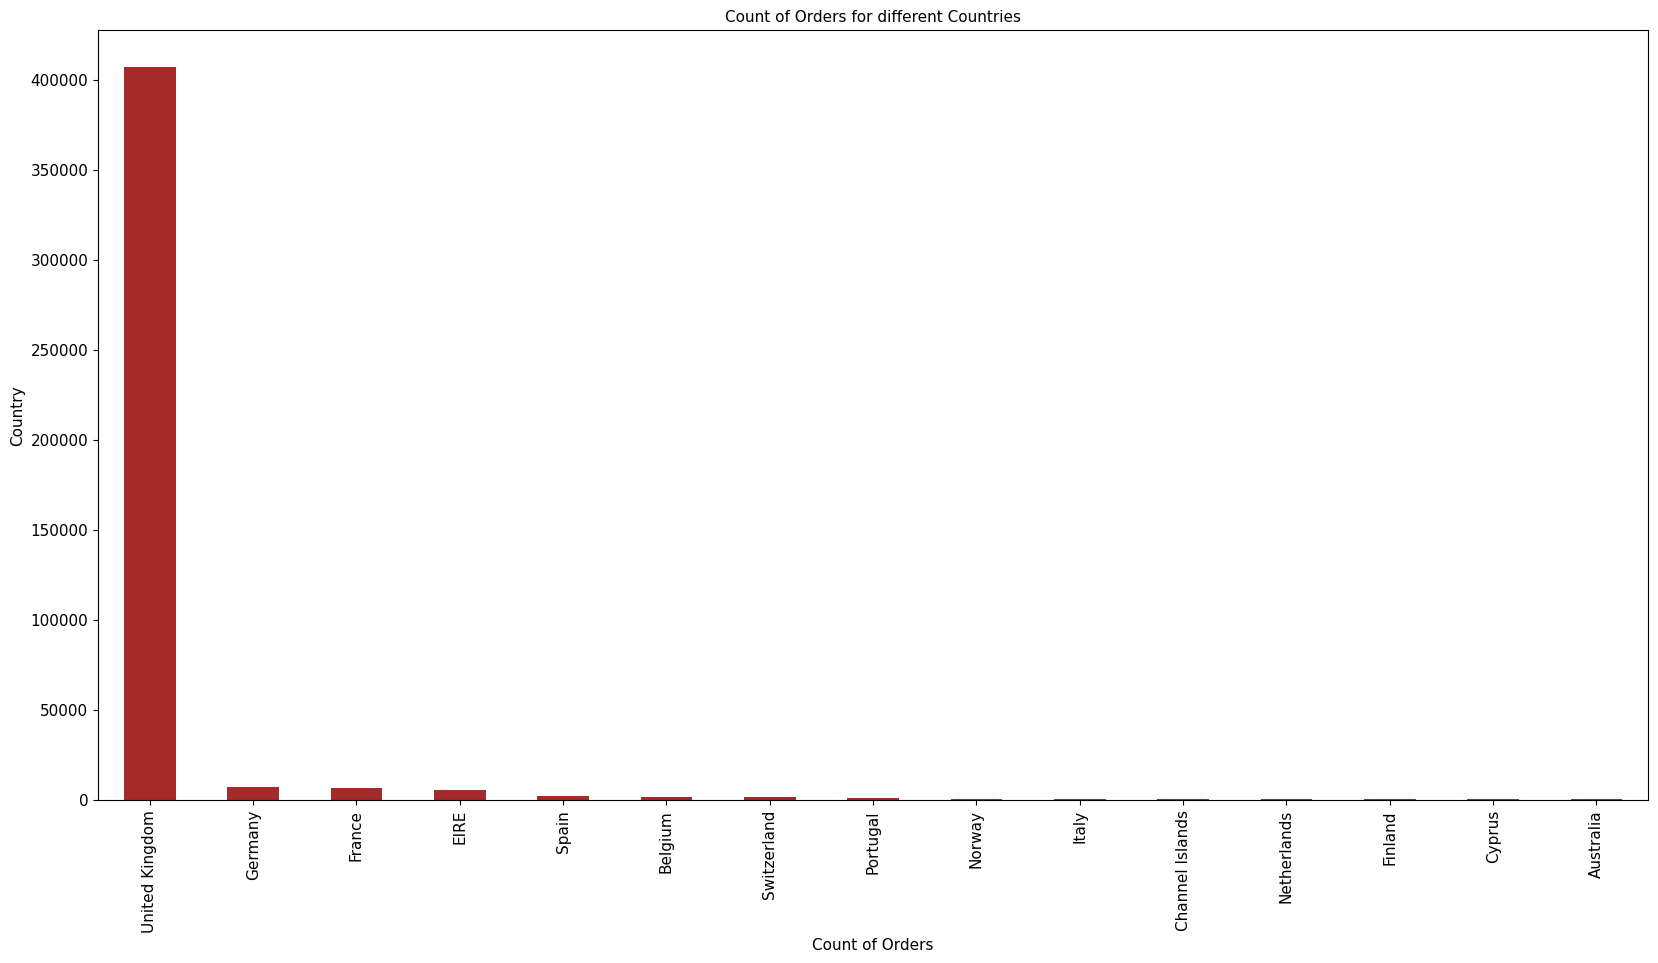

In [82]:
#Orders from each country
group_country = df_cleaned.groupby('Country')['InvoiceNo'].count().sort_values(ascending=False).head(15)

# plot number of unique customers in each country
plt.subplots(figsize=(20,10))
group_country.plot(kind = 'bar', fontsize=11,color='#A52A2A')
plt.xlabel('Count of Orders', fontsize=11)
plt.ylabel('Country', fontsize=11)
plt.title('Count of Orders for different Countries', fontsize=11)
plt.show()

In [83]:
#we can United Kingdom has the highest purchasing producst
#let see the top prodcuts for this country

In [84]:
df_cleaned[df_cleaned['Country'] == "United Kingdom"].groupby(['StockCode','Description'])['InvoiceNo'].count().sort_values(ascending=False).reset_index().head(10)

,StockCode,Description,InvoiceNo
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1487
1,85099B,JUMBO BAG RED RETROSPOT,1477
2,20725,LUNCH BAG RED RETROSPOT,1280
3,20727,LUNCH BAG BLACK SKULL.,1161
4,21212,PACK OF 72 RETROSPOT CAKE CASES,1053
5,22469,HEART OF WICKER SMALL,1026
6,84879,ASSORTED COLOUR BIRD ORNAMENT,1021
7,22382,LUNCH BAG SPACEBOY DESIGN,1016
8,22457,NATURAL SLATE HEART CHALKBOARD,1010
9,20728,LUNCH BAG CARS BLUE,992


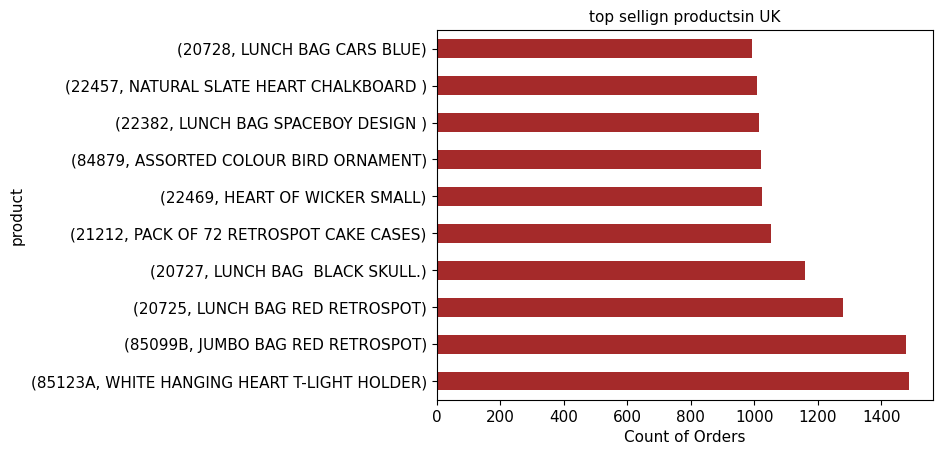

In [85]:
group_desc_uk = df_cleaned[df_cleaned['Country'] == "United Kingdom"].groupby(['StockCode','Description'])['InvoiceNo'].count().sort_values(ascending=False).head(10)

# plot number of unique customers in each country
# plt.subplots(figsize=(20,10))
group_desc_uk.plot(kind = 'barh', fontsize=11,color='#A52A2A')
plt.xlabel('Count of Orders', fontsize=11)
plt.ylabel('product', fontsize=11)
plt.title('top sellign productsin UK', fontsize=11)
plt.show()

In [86]:
#Classification of customers according to their spending habits

#Grouping customers with their total spending amount
df_price = df_cleaned.groupby(['CustomerID'], as_index=False)['Revenue'].sum()

# Customers spending less than 1000 are marked as Low, between 1000 and 10000 are marked as Average and above 10000 are marked as high
conditions = [
    (df_price['Revenue'] <= 1000),
    ((df_price['Revenue'] > 1000) & (df_price['Revenue'] <= 5000)),
    ((df_price['Revenue'] > 5000) & (df_price['Revenue'] <= 10000)),
    (df_price['Revenue'] > 10000)
    ]

# a list of the values we want to assign for each condition
values = ['Low','Average','Above Average','High']

# a new column and use np.select to assign values to it using our lists as arguments
df_price['spend_category'] = np.select(conditions, values)

# display updated DataFrame
df_price.head()

,CustomerID,Revenue,spend_category
0,12347.0,2605.77,Average
1,12348.0,90.20,Low
2,12349.0,1038.75,Average
3,12350.0,294.40,Low
4,12352.0,1111.74,Average


C:\Users\User\AppData\Local\Temp\ipykernel_19160\2853815765.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df_price, x="spend_category", kind="count", palette="ch:.51")


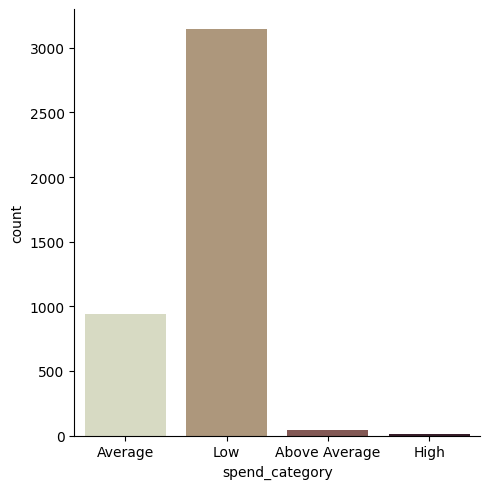

In [87]:
sns.catplot(data=df_price, x="spend_category", kind="count", palette="ch:.51")

In [88]:
#Loyalty of a customer
from datetime import timedelta

snapshot_date = df_cleaned['Date'].max() + timedelta(days=1)

# Grouping by CustomerID
loyal_cus_data = df_cleaned.groupby(['CustomerID']).agg({
                'Date': lambda x: (snapshot_date - x.max()).days,
                'InvoiceNo': 'count',
                'Revenue': 'sum'})# Rename the columns 
loyal_cus_data.rename(columns={'Date': 'Recency',
                                'InvoiceNo': 'Frequency',
                                'Revenue': 'Monetary'}, inplace=True)

In [89]:
loyal_cus_data['R_rank'] = loyal_cus_data['Recency'].rank(ascending=False)
loyal_cus_data['F_rank'] = loyal_cus_data['Frequency'].rank(ascending=True)
loyal_cus_data['M_rank'] = loyal_cus_data['Monetary'].rank(ascending=True)

# normalizing the rank of the customers
loyal_cus_data['R_rank_norm'] = (loyal_cus_data['R_rank']/loyal_cus_data['R_rank'].max())*100
loyal_cus_data['F_rank_norm'] = (loyal_cus_data['F_rank']/loyal_cus_data['F_rank'].max())*100
loyal_cus_data['M_rank_norm'] = (loyal_cus_data['F_rank']/loyal_cus_data['M_rank'].max())*100

loyal_cus_data.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

loyal_cus_data.head()

,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
CustomerID,,,,,,
12347.0,3,150,2605.77,96.308847,87.698987,87.698987
12348.0,249,6,90.20,11.702771,9.864930,9.864930
12349.0,19,61,1038.75,74.900157,66.184274,66.184274
12350.0,311,16,294.40,5.252330,27.375784,27.375784
12352.0,37,66,1111.74,58.429142,68.560058,68.560058


In [90]:
loyal_cus_data['RFM_Score'] = 0.15*loyal_cus_data['R_rank_norm']+0.28 * \
loyal_cus_data['F_rank_norm']+0.57*loyal_cus_data['M_rank_norm']
loyal_cus_data['RFM_Score'] *= 0.05
loyal_cus_data = loyal_cus_data.round(2)

loyal_cus_data.head(2)

,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score
CustomerID,,,,,,,
12347.0,3,150,2605.77,96.31,87.70,87.70,4.45
12348.0,249,6,90.20,11.70,9.86,9.86,0.51


In [91]:
conditions = [
    (loyal_cus_data['RFM_Score'] >= 3),
    ((loyal_cus_data['RFM_Score'] < 3) & (loyal_cus_data['RFM_Score'] >= 2)),
    (loyal_cus_data['RFM_Score'] < 2)
    ]

# create a list of the values we want to assign for each condition
values = ['Loyal','Potential','Needs Attention']

# create a new column and use np.select to assign values to it using our lists as arguments
loyal_cus_data['Loyality'] = np.select(conditions, values)

# display updated DataFrame
loyal_cus_data.head()

,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Loyality
CustomerID,,,,,,,,
12347.0,3,150,2605.77,96.31,87.70,87.70,4.45,Loyal
12348.0,249,6,90.20,11.70,9.86,9.86,0.51,Needs Attention
12349.0,19,61,1038.75,74.90,66.18,66.18,3.37,Loyal
12350.0,311,16,294.40,5.25,27.38,27.38,1.20,Needs Attention
12352.0,37,66,1111.74,58.43,68.56,68.56,3.35,Loyal


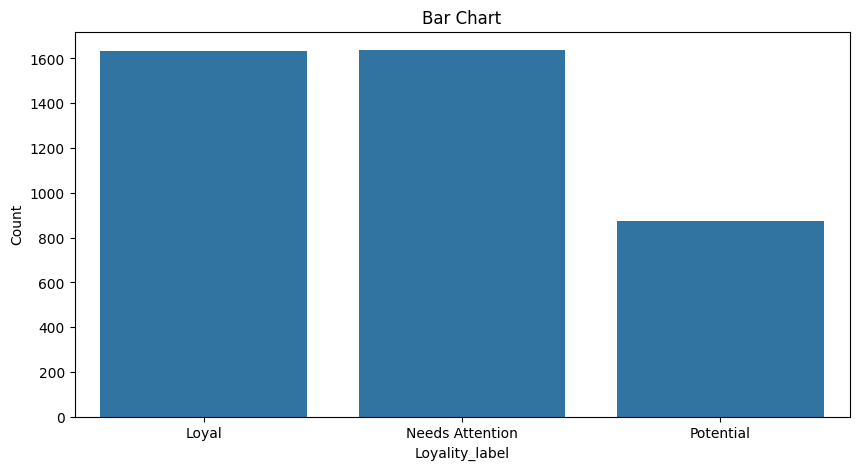

In [92]:
# create the bar chart
sns.countplot(x='Loyality', data=loyal_cus_data,)
fig = plt.gcf().set_size_inches(10, 5)

# add labels and title
plt.xlabel('Loyality_label')
plt.ylabel('Count')
plt.title('Bar Chart')

# show the chart
plt.show()

In [93]:
df_cleaned.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Revenue', 'Date', 'Year',
       'Month', 'Time_hour', 'day', 'year_month'],
      dtype='object')

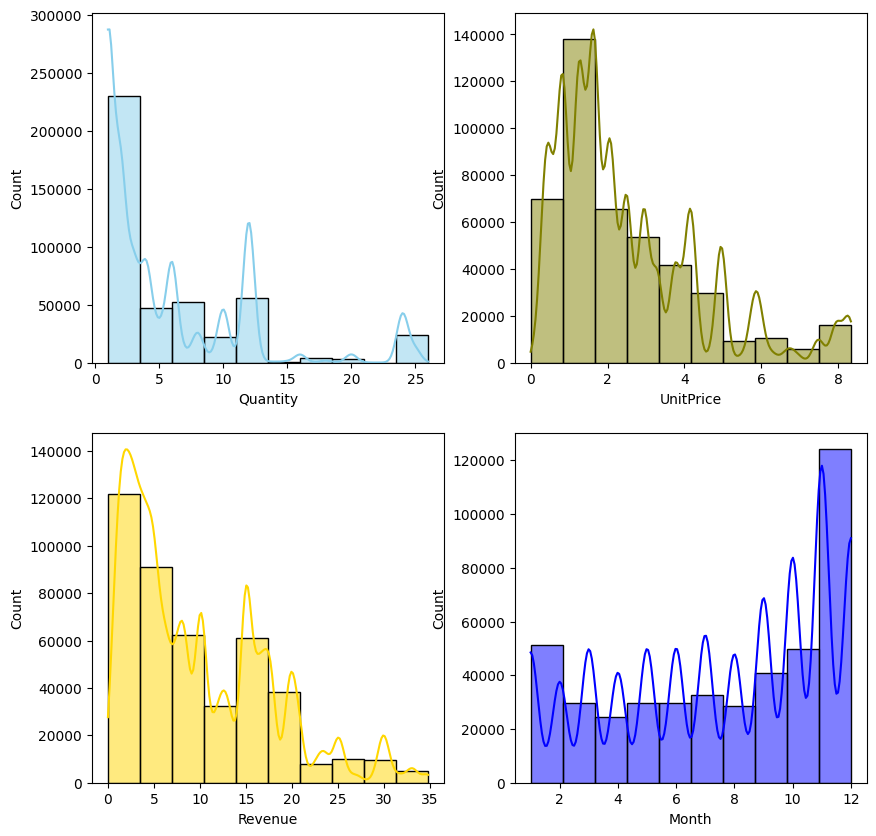

In [94]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.histplot(data=df_cleaned, x="Quantity", bins= 10, kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df_cleaned, x="UnitPrice", bins= 10, kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df_cleaned, x="Revenue", bins= 10, kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df_cleaned, x="Month", bins= 10, kde=True, color="blue", ax=axs[1, 1])
plt.show()

Except for the invoice month feature, all other variables' distribution seem skewed to right. One important insight is that the number of transactions is quite high in december. 

In [95]:
df_cleaned[['Quantity', 'UnitPrice','Revenue', 'Month']].corr()

,Quantity,UnitPrice,Revenue,Month
Quantity,1.000000,-0.422408,0.530820,-0.022217
UnitPrice,-0.422408,1.000000,0.234975,-0.012865
Revenue,0.530820,0.234975,1.000000,-0.021794
Month,-0.022217,-0.012865,-0.021794,1.000000


In [96]:
# This correlation plot shows that as quantity increses, spending increases as well. There is a positive relation between the two.

<Axes: xlabel='Quantity', ylabel='Revenue'>

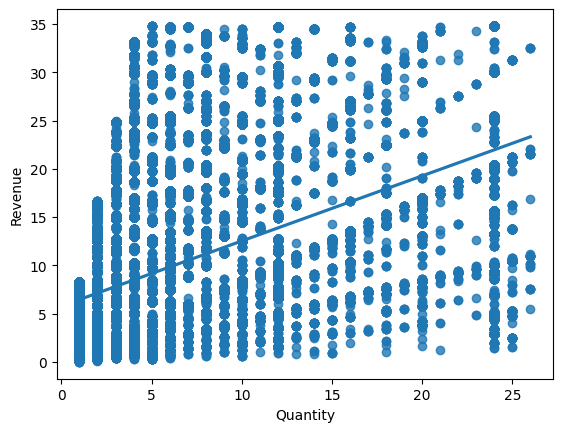

In [97]:
sns.regplot(x=df_cleaned["Quantity"], y=df_cleaned["Revenue"])

In [98]:
#define function for classifying parts of days
def f(row):
    if 5 <= row['Time_hour'] <= 7:
        val = 'night'
    elif 8 <= row['Time_hour'] <= 13:
        val = 'morning'
    elif 14 <= row['Time_hour'] <= 17:
        val = 'afternoon'
    elif 18 <= row['Time_hour'] <= 22:
        val = 'evening'
    else:
        val = 'notime'
    return val

df_cleaned['time'] = df_cleaned.apply(f, axis=1)

In [99]:
df_cleaned.groupby('time')['Quantity'].sum()

time
afternoon     909314
evening        42596
morning      1577784
night           1851
Name: Quantity, dtype: int64

In [100]:
df['Quantity'].sum()

5162502

In [101]:
(1577784/5162502)*100

30.562390096894877

C:\Users\User\AppData\Local\Temp\ipykernel_19160\786978844.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


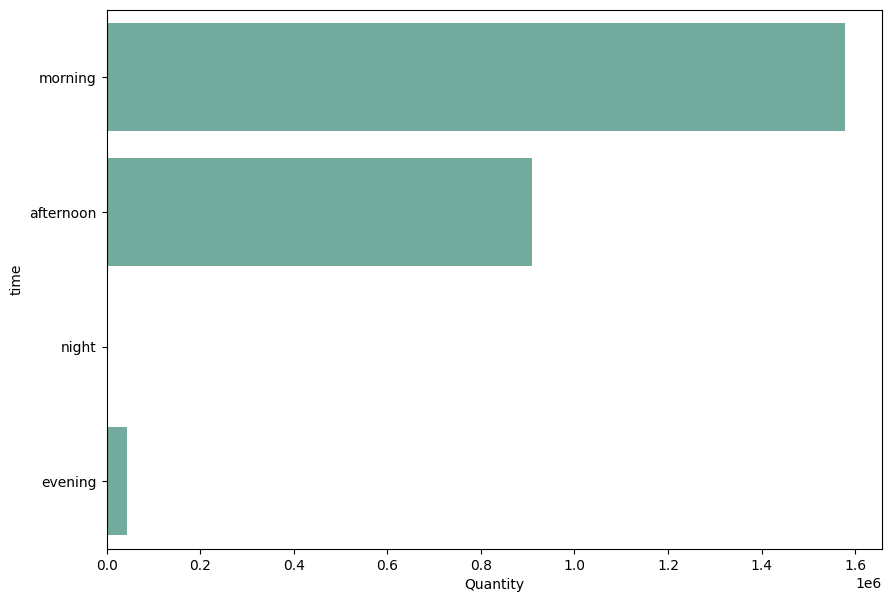

In [102]:
plt.figure(figsize=(10, 7))
sns.barplot(
    x="Quantity", 
    y="time", 
    data=df_cleaned, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2');

Customer Metrics

In [103]:
# Customer Metrics
# Average Purchase Frequency
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])
df_cleaned.sort_values(['CustomerID', 'InvoiceDate'], inplace=True)
df_cleaned['TimeDiff'] = df_cleaned.groupby('CustomerID')['InvoiceDate'].diff().dt.days
customer_metrics = df_cleaned.groupby('CustomerID').agg(avg_purc_freq=('TimeDiff', 'mean')).reset_index()

In [104]:
customer_metrics

,CustomerID,avg_purc_freq
0,12347.0,2.429530
1,12348.0,21.800000
2,12349.0,0.000000
3,12350.0,0.000000
4,12352.0,3.969231
...,...,...
4141,18280.0,0.000000
4142,18281.0,0.000000
4143,18282.0,16.857143
4144,18283.0,0.456704


In [105]:
# Average Spend per Visit
avg_spen_per_cust= df_cleaned.groupby('CustomerID').agg({'Revenue':"sum","InvoiceNo":"nunique"}).reset_index()
avg_spen_per_cust['avg_spend_per_cust'] = avg_spen_per_cust['Revenue']/avg_spen_per_cust['InvoiceNo']
avg_spen_per_cust

,CustomerID,Revenue,InvoiceNo,avg_spend_per_cust
0,12347.0,2605.77,7,372.252857
1,12348.0,90.20,3,30.066667
2,12349.0,1038.75,1,1038.750000
3,12350.0,294.40,1,294.400000
4,12352.0,1111.74,7,158.820000
...,...,...,...,...
4141,18280.0,160.70,1,160.700000
4142,18281.0,46.92,1,46.920000
4143,18282.0,113.13,2,56.565000
4144,18283.0,2002.63,16,125.164375


In [106]:
# Total Spend per Customer
avg_spen_per_cust.rename(columns={'Revenue':"total_spent"},inplace=True)

In [107]:
avg_spen_per_cust

,CustomerID,total_spent,InvoiceNo,avg_spend_per_cust
0,12347.0,2605.77,7,372.252857
1,12348.0,90.20,3,30.066667
2,12349.0,1038.75,1,1038.750000
3,12350.0,294.40,1,294.400000
4,12352.0,1111.74,7,158.820000
...,...,...,...,...
4141,18280.0,160.70,1,160.700000
4142,18281.0,46.92,1,46.920000
4143,18282.0,113.13,2,56.565000
4144,18283.0,2002.63,16,125.164375


In [108]:
customer_metric_data = customer_metrics.merge(avg_spen_per_cust[["CustomerID","avg_spend_per_cust","total_spent"]], on= "CustomerID", how="left")

In [109]:
customer_metric_data

,CustomerID,avg_purc_freq,avg_spend_per_cust,total_spent
0,12347.0,2.429530,372.252857,2605.77
1,12348.0,21.800000,30.066667,90.20
2,12349.0,0.000000,1038.750000,1038.75
3,12350.0,0.000000,294.400000,294.40
4,12352.0,3.969231,158.820000,1111.74
...,...,...,...,...
4141,18280.0,0.000000,160.700000,160.70
4142,18281.0,0.000000,46.920000,46.92
4143,18282.0,16.857143,56.565000,113.13
4144,18283.0,0.456704,125.164375,2002.63


In [110]:
#Sales Volume per Product
#Average Price

In [111]:
product_metric_data = df_cleaned.groupby('StockCode').agg(averageprice=('UnitPrice', 'mean'),salesvolume=('Quantity', 'sum')).reset_index()

In [112]:
product_metric_data

,StockCode,averageprice,salesvolume
0,10002,1.108462,414
1,10080,0.411905,255
2,10120,0.210000,132
3,10125,0.870824,705
4,10133,0.667216,1702
...,...,...,...
3664,M,1.562732,759
3665,PADS,0.001000,3
3666,POST,3.083143,44
3667,gift_0001_10,8.330000,9


Model Building - Time series

In [113]:
model_df =  df_cleaned[["InvoiceDate","Revenue"]].copy()

In [114]:
model_df

,InvoiceDate,Revenue
14938,2010-12-07 14:57:00,25.20
14939,2010-12-07 14:57:00,17.00
14942,2010-12-07 14:57:00,15.00
14943,2010-12-07 14:57:00,15.00
14944,2010-12-07 14:57:00,15.00
...,...,...
392749,2011-10-12 10:23:00,30.00
392751,2011-10-12 10:23:00,5.04
392752,2011-10-12 10:23:00,5.04
392753,2011-10-12 10:23:00,25.20


<Axes: xlabel='Quantity', ylabel='Count'>

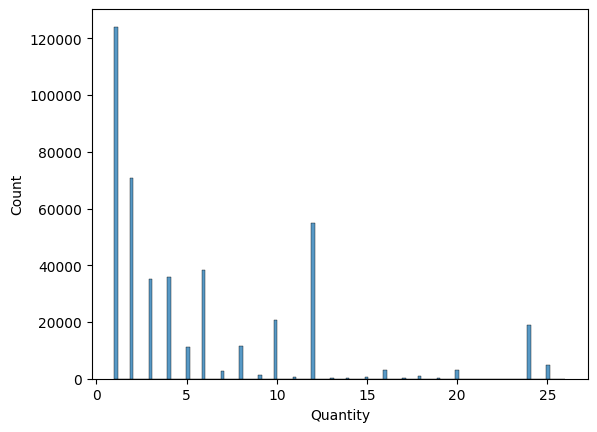

In [115]:
sns.histplot(df_cleaned['Quantity'])

In [116]:
model_df[model_df['Revenue'] <1]

,InvoiceDate,Revenue
479878,2011-11-18 12:07:00,0.84
479882,2011-11-18 12:07:00,0.85
479883,2011-11-18 12:07:00,0.85
479884,2011-11-18 12:07:00,0.85
479937,2011-11-18 12:07:00,0.83
...,...,...
530464,2011-12-06 12:02:00,0.78
530465,2011-12-06 12:02:00,0.78
530466,2011-12-06 12:02:00,0.78
530467,2011-12-06 12:02:00,0.78


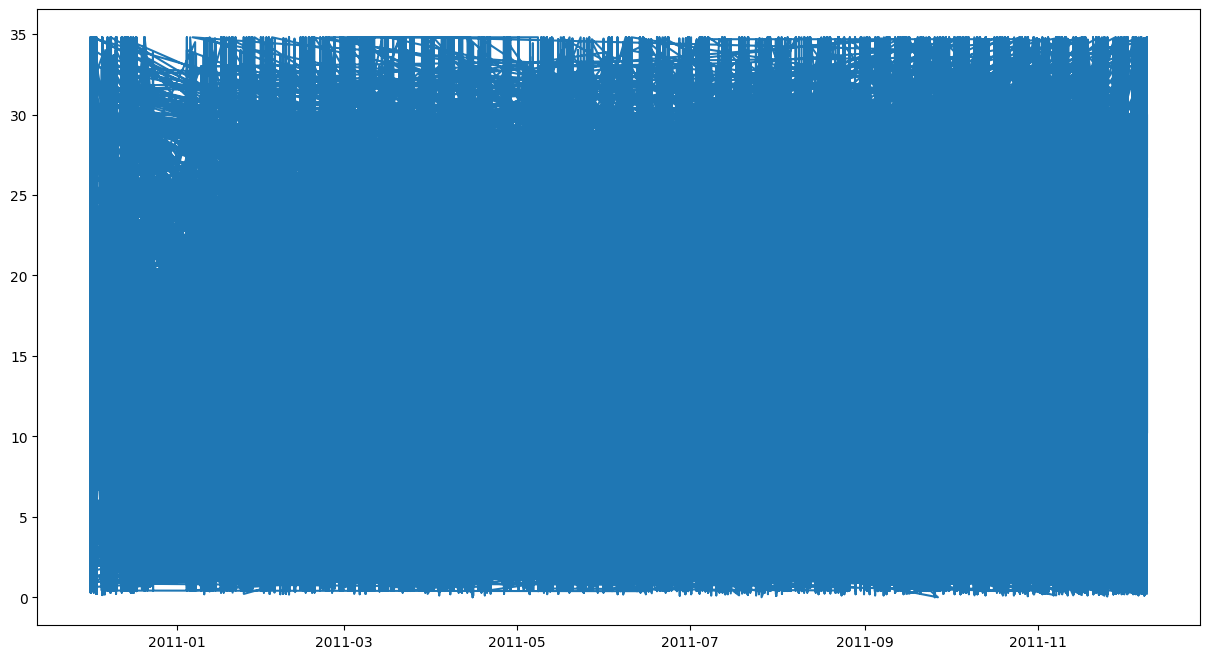

In [117]:
# importing the module
import matplotlib.pyplot as plt
# setting the size
plt.figure(figsize=(15,8))
# plotting the graph
plt.plot(model_df.InvoiceDate, model_df.Revenue)
plt.show()

In [118]:
model_df['InvoiceDate'] = pd.to_datetime(model_df['InvoiceDate'])
model_df.set_index('InvoiceDate', inplace=True)

In [119]:
model_df

,Revenue
InvoiceDate,
2010-12-07 14:57:00,25.20
2010-12-07 14:57:00,17.00
2010-12-07 14:57:00,15.00
2010-12-07 14:57:00,15.00
2010-12-07 14:57:00,15.00
...,...
2011-10-12 10:23:00,30.00
2011-10-12 10:23:00,5.04
2011-10-12 10:23:00,5.04


In [120]:
#Determine rolling statistics
rolmean = model_df.rolling(window=12).mean().fillna(1)
rolstd = model_df.rolling(window=12).std().fillna(1)

In [121]:
rolstd

,Revenue
InvoiceDate,
2010-12-07 14:57:00,1.000000
2010-12-07 14:57:00,1.000000
2010-12-07 14:57:00,1.000000
2010-12-07 14:57:00,1.000000
2010-12-07 14:57:00,1.000000
...,...
2011-10-12 10:23:00,8.304379
2011-10-12 10:23:00,8.690448
2011-10-12 10:23:00,8.875139


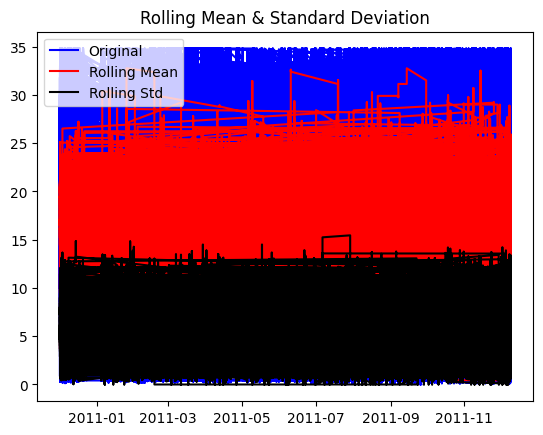

In [122]:
#Plot rolling statistics
orig = plt.plot(model_df, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
# labeling
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

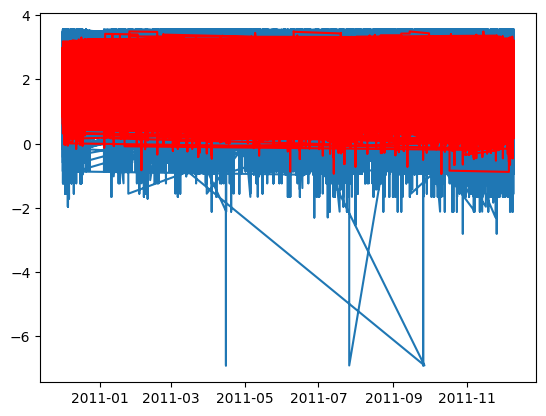

In [123]:
# importing the module
import numpy as np

#Estimating trend
logScale = np.log(model_df)
#The below transformation is required to make series stationary
movingAverage = logScale.rolling(window=12).mean()
movingSTD = logScale.rolling(window=12).std()
# plotting the graph
plt.plot(logScale)
plt.plot(movingAverage, color='red')
plt.show()

In [124]:
# Ensure Quantity column contains numeric values
model_df['Revenue'] = pd.to_numeric(model_df['Revenue'], errors='coerce')

In [125]:
# Aggregate data by day and sum the Quantity
data_daily = model_df[['Revenue']].resample('D').sum()

# Fill missing values (if any)
data_daily.fillna(0, inplace=True)

In [126]:
# Split data into train and test sets
train_size = int(0.8 * len(data_daily))
train, test = data_daily.iloc[:train_size], data_daily.iloc[train_size:]

In [127]:
# Define ARIMA model parameters (replace with your desired values)
order = (5, 1, 0)  # ARIMA(p, d, q)
seasonal_order = (1, 1, 1, 12)  # Seasonal ARIMA (SARIMA)

# Fit ARIMA model to the training data
model = ARIMA(train['Revenue'], order=order, seasonal_order=seasonal_order)
arima_model = model.fit()

In [128]:
# Make predictions
predictions = arima_model.predict(start=test.index[0], end=test.index[-1], typ='levels')

c:\Users\User\anaconda3\envs\alkyle_test\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [129]:
# Calculate evaluation metrics
mae = mean_absolute_error(test, predictions)
rmse = np.sqrt(mean_squared_error(test, predictions))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 6854.784764889571
Root Mean Squared Error (RMSE): 9468.851179349364


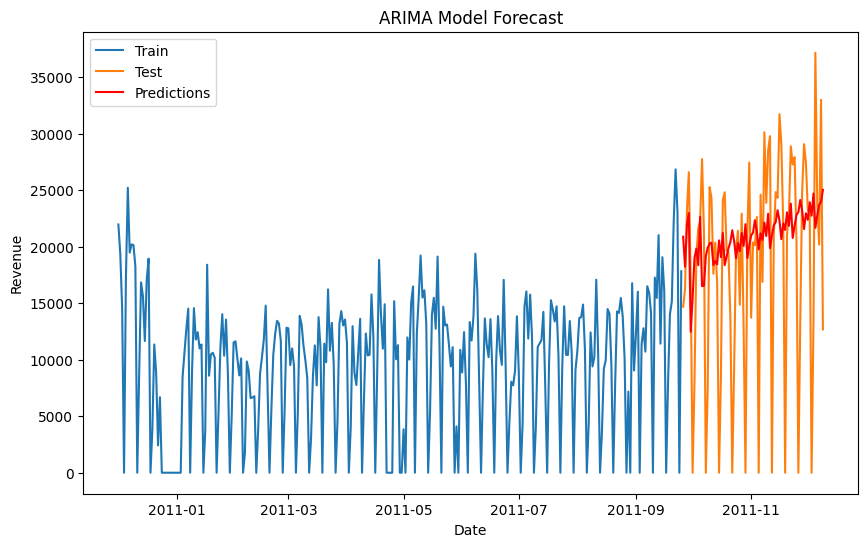

In [130]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predictions, label='Predictions', color='red')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()

The above graph shows that the model has learned the trend

In [131]:
model_df_1 = df_cleaned[['InvoiceDate','Revenue']]

In [132]:
# Extract features from the InvoiceDate column
model_df_1['InvoiceDate'] = pd.to_datetime(model_df_1['InvoiceDate'])
model_df_1['Year'] = model_df_1['InvoiceDate'].dt.year
model_df_1['Month'] = model_df_1['InvoiceDate'].dt.month
model_df_1['Day'] = model_df_1['InvoiceDate'].dt.day
model_df_1['Hour'] = model_df_1['InvoiceDate'].dt.hour
model_df_1['Minute'] = model_df_1['InvoiceDate'].dt.minute
model_df_1['Second'] = model_df_1['InvoiceDate'].dt.second

C:\Users\User\AppData\Local\Temp\ipykernel_19160\3588161092.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df_1['InvoiceDate'] = pd.to_datetime(model_df_1['InvoiceDate'])
C:\Users\User\AppData\Local\Temp\ipykernel_19160\3588161092.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df_1['Year'] = model_df_1['InvoiceDate'].dt.year
C:\Users\User\AppData\Local\Temp\ipykernel_19160\3588161092.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [133]:
# Define features (X) and target variable (y)
X = model_df_1[['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']]
y = model_df_1['Revenue']

In [134]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [135]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [136]:
# Standardize the features (optional but recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [137]:
# Initialize and fit the regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [138]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [139]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [140]:
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 57.248421099252624
R-squared Score: 0.042728965453460166


In [141]:
# Define a list of regression models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor()}

In [142]:
# Define hyperparameters for grid search
param_grid = {
    "Decision Tree": {"max_depth": [None, 5, 10, 20]}}

In [143]:
# Perform grid search for each model
best_models = {}
for name, model in models.items():
    print(f"Grid search for {name}...")
    grid_search = GridSearchCV(model, param_grid.get(name, {}), cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_

Grid search for Linear Regression...
Grid search for Decision Tree...


In [144]:
# Evaluate the best models
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}:")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared Score: {r2}")
    print()

Linear Regression:
Mean Squared Error: 57.2484210992526
R-squared Score: 0.0427289654534605

Decision Tree:
Mean Squared Error: 33.26039090030734
R-squared Score: 0.4438412764020284



In [145]:
# Model Accuracy:
# The Mean Squared Error (MSE) of 33.26 indicates the average squared difference between the actual and predicted values.
# A lower MSE suggests better accuracy, but it should be considered relative to the scale of the target variable.
# The R-squared score of 0.44 represents the proportion of variance in the target variable that is explained by the model. 
# It ranges from 0 to 1, where 1 indicates a perfect fit. An R-squared score of 0.44 suggests that the model explains 44% of 
# the variance in the target variable.